In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_taxi = sns.load_dataset('taxis')

In [3]:
df_taxi.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [4]:
display(df_taxi.head(3), df_taxi.dtypes, df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

In [5]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

So why is the data missing? Let's display the rows where one of the columns with the most missing values has missing values.

In [6]:
df_taxi[df_taxi['dropoff_zone'].isna()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


All of these rows are missing values in both the dropoff_zone and dropoff_borough columns. The most likely option is that the trip simply did not take place, because there are no values in the columns that indicate the completion of the trip. However, if a certain distance was traveled, I have an assumption that satellite data was used for the location and it was not always possible to get it. There are certain rows with distance==0, and total!=0. Apparently certain sum was charged for the downtime.

In [7]:
# filling null values
df_taxi_clean = df_taxi.fillna('NA')

In [8]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

In [9]:
# creating a column with pickup days only
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

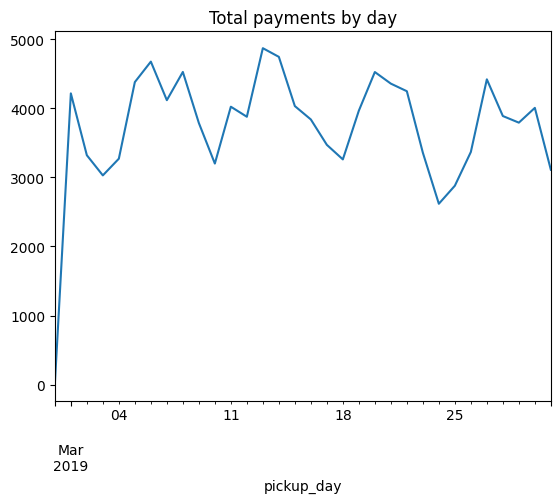

In [10]:
# Let's group the data by pickup_day and display a graph of total payments by day.
df_taxi_clean.groupby('pickup_day')['total'].sum().plot()
plt.title('Total payments by day');

In [11]:
# there's definitely an outlier
df_taxi_clean.groupby('pickup_day').size()

pickup_day
2019-02-28      1
2019-03-01    241
2019-03-02    198
2019-03-03    169
2019-03-04    171
2019-03-05    228
2019-03-06    257
2019-03-07    218
2019-03-08    235
2019-03-09    204
2019-03-10    185
2019-03-11    209
2019-03-12    218
2019-03-13    244
2019-03-14    260
2019-03-15    201
2019-03-16    220
2019-03-17    178
2019-03-18    173
2019-03-19    201
2019-03-20    233
2019-03-21    221
2019-03-22    229
2019-03-23    209
2019-03-24    149
2019-03-25    155
2019-03-26    178
2019-03-27    232
2019-03-28    205
2019-03-29    209
2019-03-30    215
2019-03-31    187
dtype: int64

In [12]:
# so we delete it
df_taxi_clean = df_taxi_clean[df_taxi_clean.pickup_day!='2019-02-28']

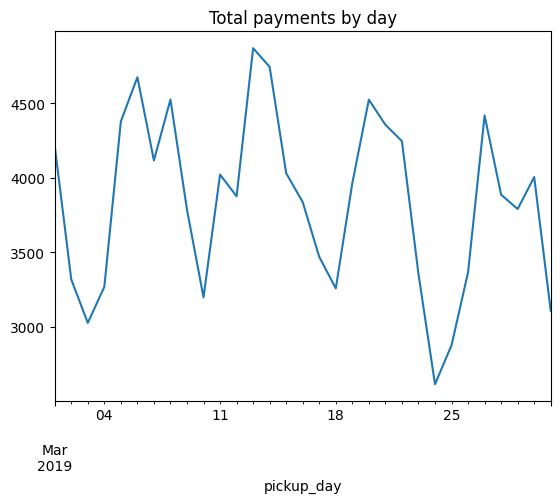

In [13]:
df_taxi_clean.groupby('pickup_day')['total'].sum().plot()
plt.title('Total payments by day');

In [14]:
# let's look at the dynamics of total payments by borough
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values='total', aggfunc='sum')
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,NA,Queens
pickup_day,,,,,
2019-03-01,123.42,353.05,3169.47,14.60,553.29
2019-03-02,NaN,146.56,2716.33,NaN,456.13
2019-03-03,80.75,407.06,2100.23,10.55,428.73
2019-03-04,92.00,188.73,2026.17,NaN,962.18
2019-03-05,98.16,558.40,2981.26,NaN,739.56
2019-03-06,130.65,198.53,3501.07,10.00,833.36
2019-03-07,NaN,440.75,3087.82,NaN,587.13
2019-03-08,79.20,237.47,3408.85,18.35,780.34
2019-03-09,80.22,187.88,2967.71,38.26,511.73


In [15]:
borough_pivot.drop(columns=['NA'], inplace=True)

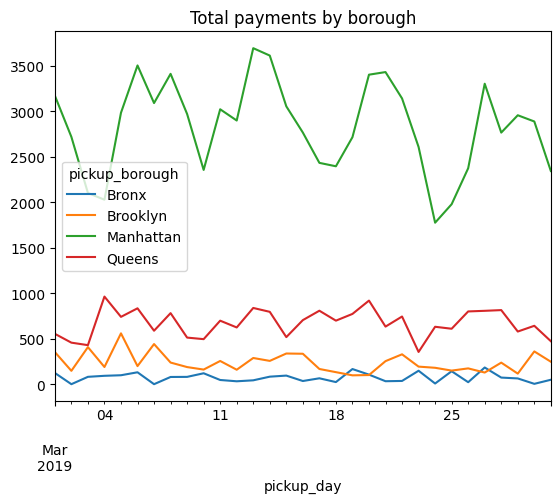

In [16]:
borough_pivot.fillna(0).plot()
plt.title('Total payments by borough');

Manhattan has the highest payments for taxi rides, therefore it'll be a good idea to place more taxi cars in this district.

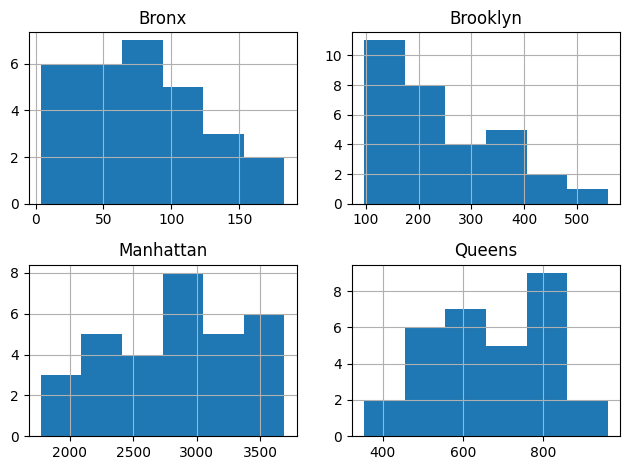

In [17]:
# or we can create a histogram for a more detailed analysis of payments by each borough
borough_pivot.hist(bins = 6)
plt.tight_layout(); 

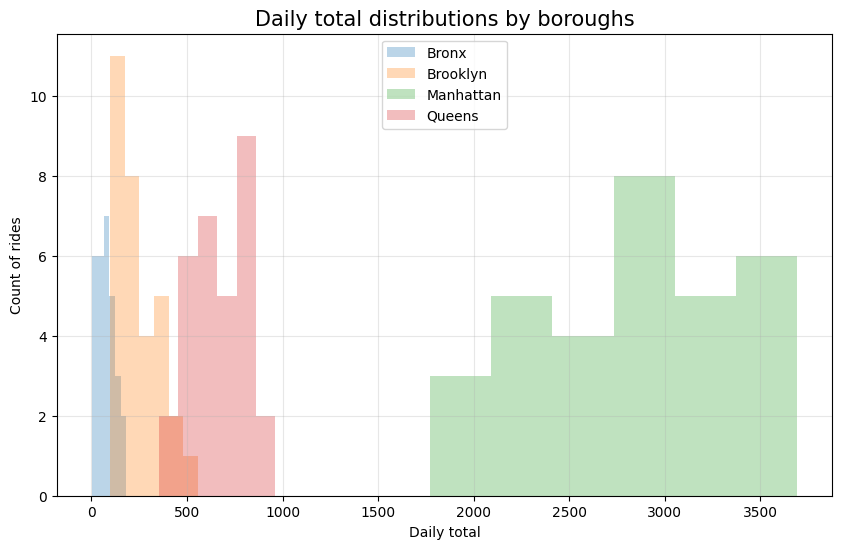

In [18]:
# or we can display all 4 histograms on one figure for a more convenient comparison
plt.figure(figsize=(10,6))
x1 = borough_pivot.Bronx
x2 = borough_pivot.Brooklyn
x3 = borough_pivot.Manhattan
x4 = borough_pivot.Queens

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=6)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.hist(x4, **kwargs)

plt.grid(axis='both', alpha=.3)

plt.title("Daily total distributions by boroughs", fontsize=15)
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.legend(borough_pivot, loc = 'upper center');

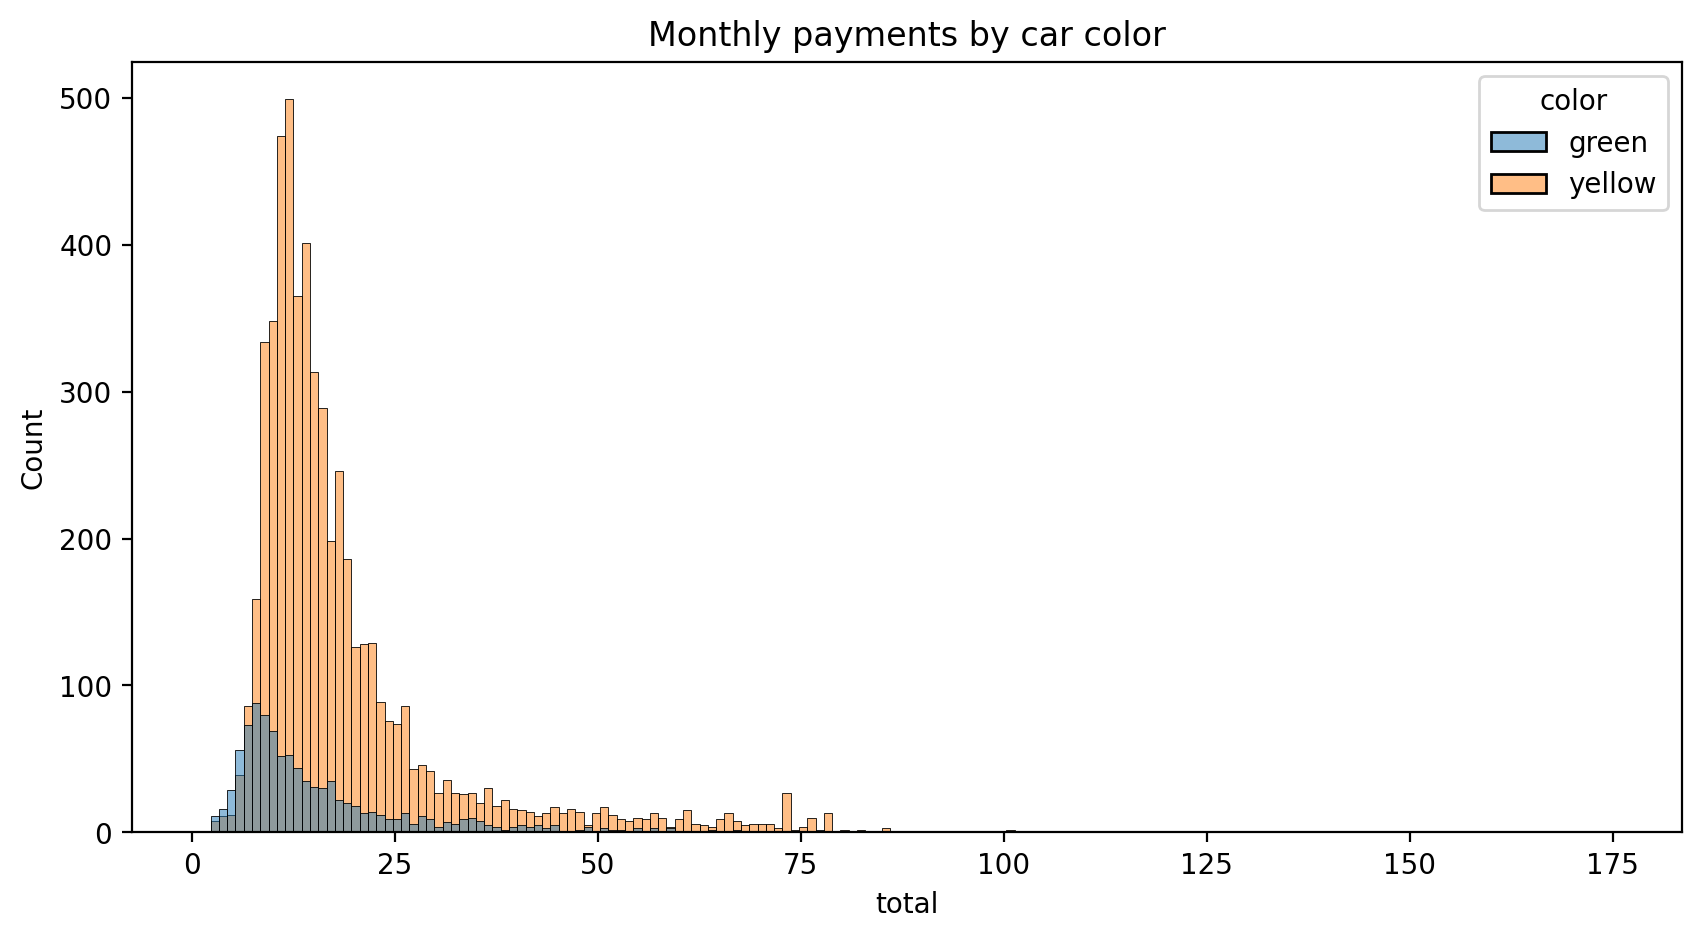

In [19]:
# let's display histograms of the amount of monthly payments by car color
plt.figure(figsize=(10,5), dpi=200)
sns.histplot(x='total', hue='color', data=df_taxi_clean.sort_values('color'))
plt.title('Monthly payments by car color');

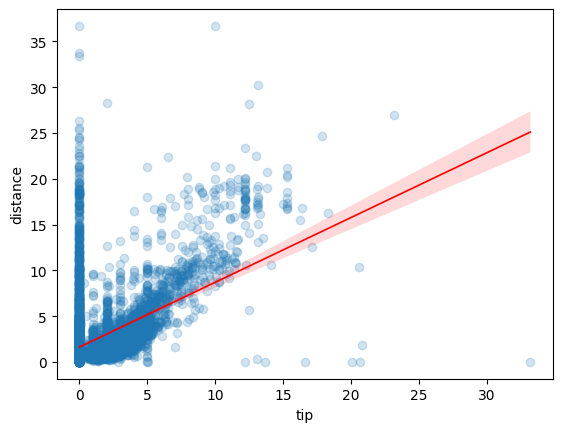

In [20]:
# is there correlation between the distance of the trip and the size of the tip?
sns.regplot(data=df_taxi_clean, x='tip', y='distance', line_kws={'color':'r', 'linewidth':1.2}, scatter_kws={'alpha':0.2});

Correlation is not really high and a straight line of points parallel to the axis along which the distance of the trip is located is at 0, so this tells us that such trips could have been without tips at all, regardless of their distance.

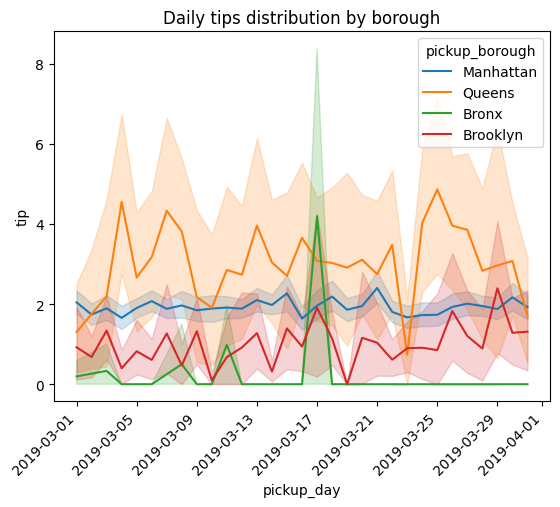

In [21]:
# let's build the daily distribution of tips by borough
sns.lineplot(x='pickup_day', y='tip', hue='pickup_borough', data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'])
plt.xticks(rotation=45, ha='right')
plt.title('Daily tips distribution by borough');

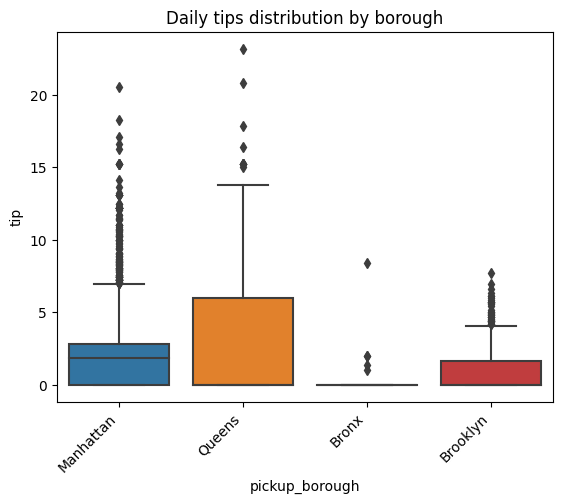

In [22]:
sns.boxplot(y='tip', x='pickup_borough', data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'])
plt.xticks(rotation=45, ha='right')
plt.title('Daily tips distribution by borough');

- Lowest average tip for trips from Bronx.
- Highest average tip for trips from Queens.
- The tip size is the stablest in Manhattan.

In [23]:
# Which payment mode is used most often?
payment_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns='payment', values='total', aggfunc='sum')
payment_pivot

payment,NA,cash,credit card
pickup_day,,,
2019-03-01,18.60,748.76,3446.47
2019-03-02,24.70,863.96,2430.36
2019-03-03,20.80,782.18,2224.34
2019-03-04,NaN,710.95,2558.13
2019-03-05,NaN,726.46,3650.92
2019-03-06,51.06,884.98,3737.57
2019-03-07,5.80,771.17,3338.73
2019-03-08,47.40,978.33,3498.48
2019-03-09,21.60,921.40,2842.80


In [24]:
payment_pivot.drop(columns=['NA'], inplace=True)

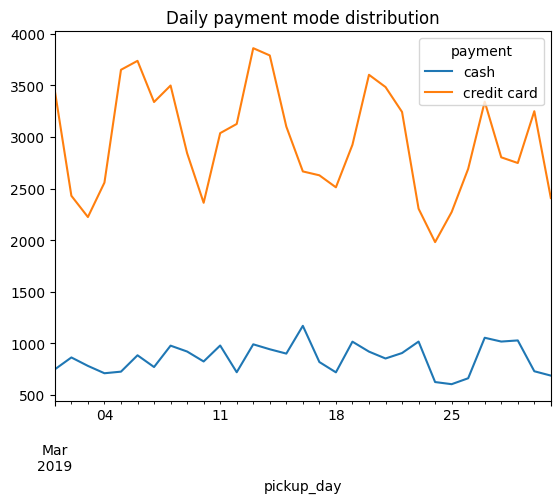

In [25]:
payment_pivot.plot()
plt.title('Daily payment mode distribution');

Payment by credit card is mostly used and for much larger sums than in cash. Therefore, all taxis should be equipped with a terminal.

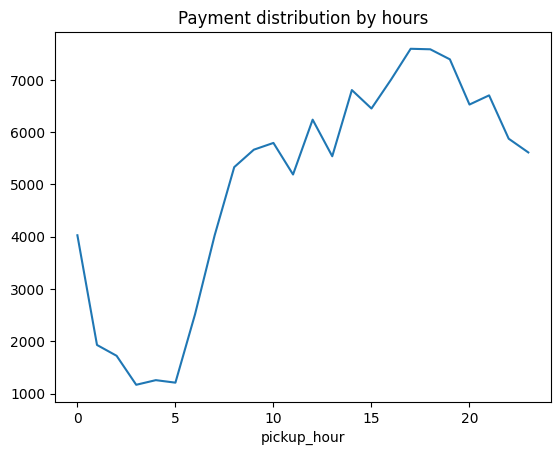

In [26]:
# What hours are the most profitable for taxi drivers?
df_taxi_clean['pickup_hour'] = df_taxi_clean.pickup.dt.hour
df_taxi_clean.groupby('pickup_hour')['total'].sum().plot()
plt.title('Payment distribution by hours');

The lineplot shows that the largest amount of payments occurs from 5 to 7 p.m. Thus, it is worth stimulating drivers to work actively during these hours.

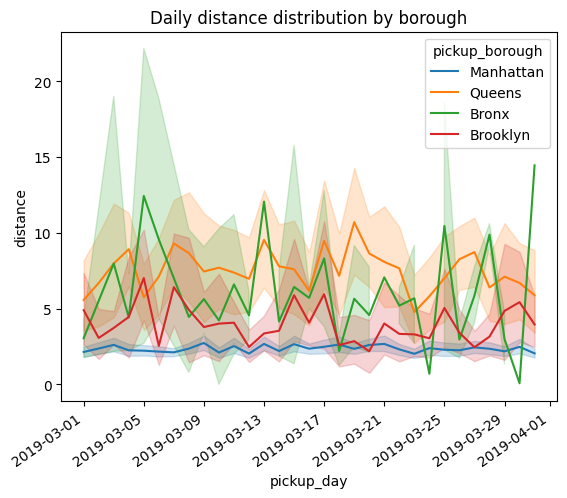

In [27]:
# From which borough travel distance is usually the shortest?
sns.lineplot(data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'], x='pickup_day', y='distance', hue='pickup_borough')
plt.xticks(rotation=35, ha='right')
plt.title('Daily distance distribution by borough');

The shortest travel distance is from Manhattan. More attention should be paid to such boroughs as Queens and Bronx for as the distance of the trip increases, the fare increases too.